In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.metrics import recall_score, precision_score,confusion_matrix,\
        roc_auc_score, f1_score, plot_roc_curve, roc_curve, RocCurveDisplay, auc, precision_recall_curve,\
        fbeta_score, accuracy_score
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report

In [3]:
#Imbalanced learn packages
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler

In [245]:
provider4 = pd.read_csv('provider4.csv')

In [246]:
provider4.columns

Index(['Unnamed: 0', 'Provider', 'PotentialFraud', 'patient_count', 'Race1',
       'Race2', 'Race3', 'Race5', 'Male', 'Female', 'mean_age', 'state_count',
       'phy_count', 'no_phy', 'chronic_mean', 'claim_count', 'days_admitted',
       'coverage', 'totalamount_charged', 'revenue_day', 'annual_amount',
       'claimdiag', 'diag_grp', 'duplicate_claims', 'patient_duplicate_count',
       'inpatient', 'outpatient'],
      dtype='object')

In [247]:
x = provider4.drop(['Unnamed: 0','Provider','PotentialFraud'],axis=1)
y = provider4['PotentialFraud']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x), y, test_size=0.3, random_state=100)


## SMOTE 

In [248]:
#SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [249]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(StandardScaler().fit_transform(x_smote), y_smote, 
                                                                test_size=0.3, random_state=100)

In [250]:
def evaluate_model_stratified(X_train, X_test, y_train, y_test):
    classifiers = [LogisticRegression(penalty='l1', solver='liblinear'),
                   LinearSVC(),GaussianNB(),LinearDiscriminantAnalysis(),RandomForestClassifier(),
                   GradientBoostingClassifier(),XGBClassifier()]
    
    for classifier in classifiers:
        kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state= 100)
        model = Pipeline(steps = [('classifier', classifier)])
        str_cv= GridSearchCV(estimator= model, scoring='roc_auc', cv=kfold, param_grid = {})
        str_cv.fit(X_train, y_train)
    
        
        
        predicted_train = str_cv.predict(X_train)
        predicted_test = str_cv.predict(X_test)
    
    
        print(type(classifier).__name__)
        print('Accuracy Score for train data: {:.3f}'.format(accuracy_score(y_train, predicted_train)))
        print('Accuracy Score for test data: {:.3f}'.format(accuracy_score(y_test, predicted_test)))
        print('Precision Score for train data {:.3f}'.format(precision_score(y_train, predicted_train)))
        print('Precision Score for test data {:.3f}'.format(precision_score(y_test, predicted_test)))
        print('Recall Score for train data {:.3f}'.format(recall_score(y_train, predicted_train)))
        print('Recall Score for test data {:.3f}'.format(recall_score(y_test, predicted_test)))
        print('f1 score for train data{:.3f}'.format(f1_score(y_train, predicted_train)))
        print('f1 score for test data{:.3f}'.format(f1_score(y_test, predicted_test)))
        print('fbeta0.2_score for train data{:.3f}'.format(fbeta_score(y_train, predicted_train, beta = 0.5)))
        print('fbeta0.2_score for test data{:.3f}'.format(fbeta_score(y_test, predicted_test, beta = 0.5)))
        print('fbeta2_score for train data{:.3f}'.format(fbeta_score(y_train, predicted_train, beta = 2)))
        print('fbeta2_score for test data{:.3f}'.format(fbeta_score(y_test, predicted_test, beta = 2)))
        print('ROC-AUC Score for train data: {:.3f}'.format(roc_auc_score(y_train, predicted_train)))
        print('ROC-AUC Score for test data: {:.3f}'.format(roc_auc_score(y_test, predicted_test)))
        print('Confusion matrix for train data')
        print(confusion_matrix(y_train, predicted_train))
        print('Confusion matrix for test data')
        print(confusion_matrix(y_test, predicted_test))
        print('-' *50)


In [251]:
evaluate_model_stratified(X_train_sm, X_test_sm, y_train_sm, y_test_sm)

LogisticRegression
Accuracy Score for train data: 0.887
Accuracy Score for test data: 0.895
Precision Score for train data 0.881
Precision Score for test data 0.889
Recall Score for train data 0.893
Recall Score for test data 0.905
f1 score for train data0.887
f1 score for test data0.897
fbeta0.2_score for train data0.883
fbeta0.2_score for test data0.892
fbeta2_score for train data0.891
fbeta2_score for test data0.902
ROC-AUC Score for train data: 0.887
ROC-AUC Score for test data: 0.895
Confusion matrix for train data
[[3033  413]
 [ 366 3053]]
Confusion matrix for test data
[[1290  168]
 [ 141 1344]]
--------------------------------------------------


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

LinearSVC
Accuracy Score for train data: 0.887
Accuracy Score for test data: 0.896
Precision Score for train data 0.877
Precision Score for test data 0.887
Recall Score for train data 0.899
Recall Score for test data 0.911
f1 score for train data0.888
f1 score for test data0.899
fbeta0.2_score for train data0.881
fbeta0.2_score for test data0.891
fbeta2_score for train data0.894
fbeta2_score for test data0.906
ROC-AUC Score for train data: 0.887
ROC-AUC Score for test data: 0.896
Confusion matrix for train data
[[3015  431]
 [ 347 3072]]
Confusion matrix for test data
[[1285  173]
 [ 132 1353]]
--------------------------------------------------
GaussianNB
Accuracy Score for train data: 0.732
Accuracy Score for test data: 0.727
Precision Score for train data 0.890
Precision Score for test data 0.897
Recall Score for train data 0.527
Recall Score for test data 0.518
f1 score for train data0.662
f1 score for test data0.657
fbeta0.2_score for train data0.782
fbeta0.2_score for test data0.7

/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
Accuracy Score for train data: 1.000
Accuracy Score for test data: 0.964
Precision Score for train data 1.000
Precision Score for test data 0.961
Recall Score for train data 1.000
Recall Score for test data 0.968
f1 score for train data1.000
f1 score for test data0.964
fbeta0.2_score for train data1.000
fbeta0.2_score for test data0.962
fbeta2_score for train data1.000
fbeta2_score for test data0.967
ROC-AUC Score for train data: 1.000
ROC-AUC Score for test data: 0.964
Confusion matrix for train data
[[3446    0]
 [   0 3419]]
Confusion matrix for test data
[[1399   59]
 [  47 1438]]
--------------------------------------------------


In [252]:
classifiers = [LogisticRegression(penalty='l1', solver='liblinear'),
                   GaussianNB(),LinearDiscriminantAnalysis(),RandomForestClassifier(),
                   GradientBoostingClassifier(),XGBClassifier()]

In [253]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_sm, y_train_sm)
    yproba = model.predict_proba(X_test_sm)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_sm,  yproba)
    auc = roc_auc_score(y_test_sm, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:26:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


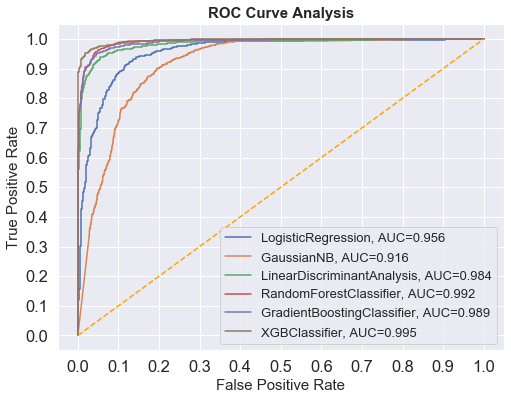

In [254]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [14]:
fig.savefig('multiple_roc_curve.png')

In [255]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
              ('LogReg', LogisticRegression(penalty='l1', solver='liblinear')),
              ('LDA', LinearDiscriminantAnalysis()),
              ('GNB', GaussianNB()),
              ('RF', RandomForestClassifier()),
              ('SVM', LinearSVC()), 
              ('XGB', XGBClassifier()),
              ('GBC', GradientBoostingClassifier()),
              
            ]
    
    
   
    results = []
    names = []
    scoring = ['f1_macro','precision_macro','recall_macro']
    target_names = ['no fraud', 'fraud']
    
    for name, model in models:
        
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=100)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        
    final = pd.concat(dfs, ignore_index=True)
    return final

In [256]:
final =  run_exps(X_train_sm, y_train_sm,X_test_sm, y_test_sm)

LogReg
              precision    recall  f1-score   support

    no fraud       0.90      0.88      0.89      1458
       fraud       0.89      0.91      0.90      1485

    accuracy                           0.90      2943
   macro avg       0.90      0.89      0.89      2943
weighted avg       0.90      0.90      0.89      2943

LDA
              precision    recall  f1-score   support

    no fraud       0.91      0.97      0.93      1458
       fraud       0.96      0.90      0.93      1485

    accuracy                           0.93      2943
   macro avg       0.93      0.93      0.93      2943
weighted avg       0.94      0.93      0.93      2943

GNB
              precision    recall  f1-score   support

    no fraud       0.66      0.94      0.77      1458
       fraud       0.90      0.52      0.66      1485

    accuracy                           0.73      2943
   macro avg       0.78      0.73      0.71      2943
weighted avg       0.78      0.73      0.71      2943

RF
 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

SVM
              precision    recall  f1-score   support

    no fraud       0.91      0.88      0.89      1458
       fraud       0.89      0.91      0.90      1485

    accuracy                           0.90      2943
   macro avg       0.90      0.90      0.90      2943
weighted avg       0.90      0.90      0.90      2943

[18:26:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the 

In [257]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

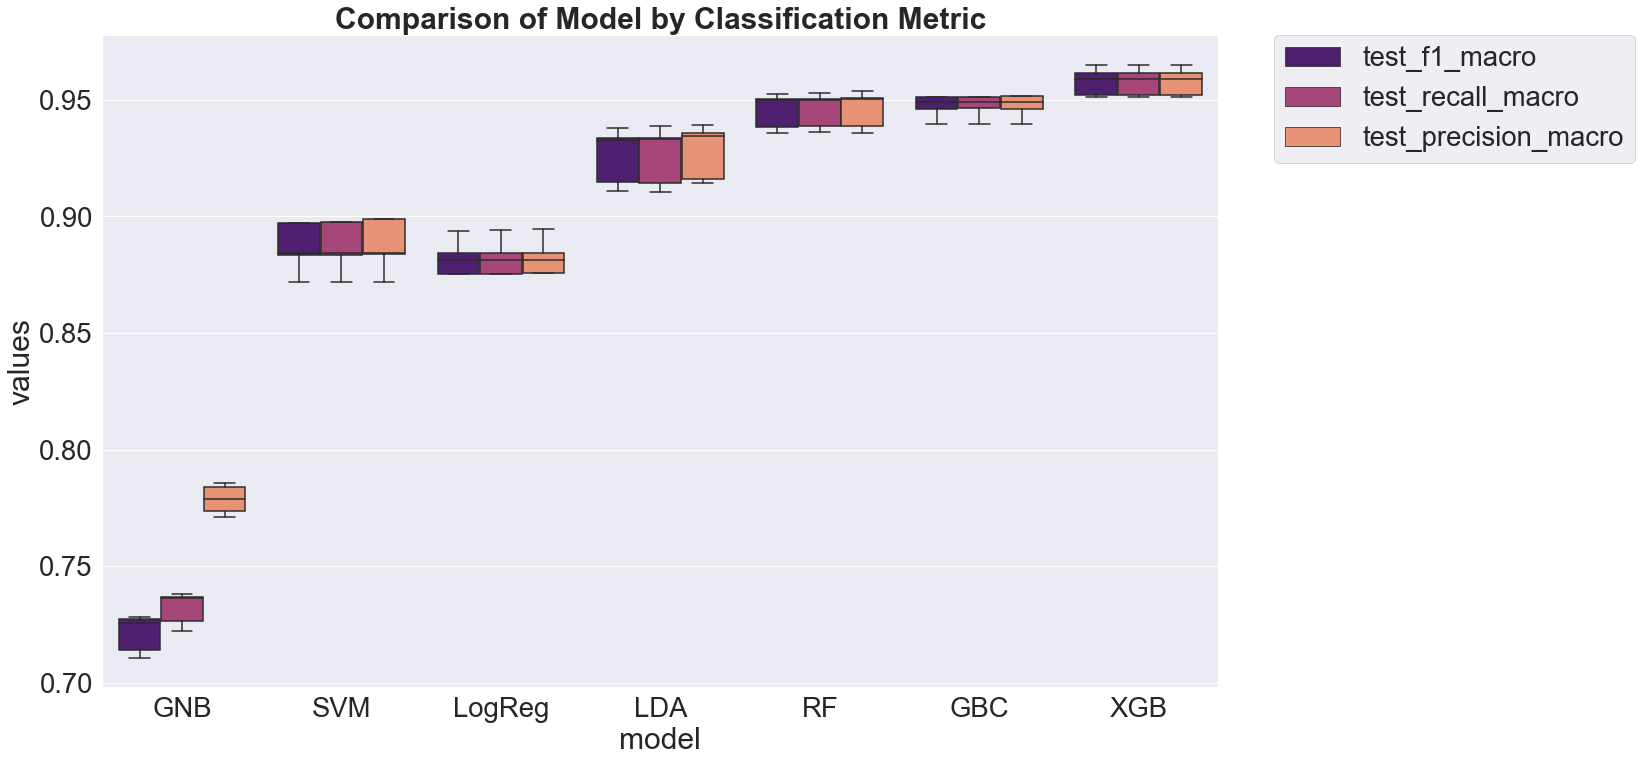

In [258]:

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric', weight = 'bold')
plt.savefig('./benchmark_models_performance.png',dpi=300)
sns.set_style("whitegrid", {'axes.grid' : False})

## Random Undersampling

In [19]:
#Undersampling via Random Under Sampler
under = RandomUnderSampler()
x_un, y_un = under.fit_resample(x, y)

In [20]:
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(StandardScaler().fit_transform(x_un), y_un, 
                                                                test_size=0.3, random_state=100)

In [21]:
evaluate_model_stratified(X_train_un, X_test_un, y_train_un, y_test_un)

LogisticRegression
Accuracy Score for train data: 0.884
Accuracy Score for test data: 0.839
Precision Score for train data 0.882
Precision Score for test data 0.797
Recall Score for train data 0.896
Recall Score for test data 0.871
f1 score for train data0.889
f1 score for test data0.833
fbeta0.2_score for train data0.885
fbeta0.2_score for test data0.811
fbeta2_score for train data0.893
fbeta2_score for test data0.856
ROC-AUC Score for train data: 0.884
ROC-AUC Score for test data: 0.841
Confusion matrix for train data
[[298  44]
 [ 38 328]]
Confusion matrix for test data
[[133  31]
 [ 18 122]]
--------------------------------------------------


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

LinearSVC
Accuracy Score for train data: 0.883
Accuracy Score for test data: 0.842
Precision Score for train data 0.871
Precision Score for test data 0.799
Recall Score for train data 0.907
Recall Score for test data 0.879
f1 score for train data0.889
f1 score for test data0.837
fbeta0.2_score for train data0.878
fbeta0.2_score for test data0.813
fbeta2_score for train data0.900
fbeta2_score for test data0.861
ROC-AUC Score for train data: 0.882
ROC-AUC Score for test data: 0.845
Confusion matrix for train data
[[293  49]
 [ 34 332]]
Confusion matrix for test data
[[133  31]
 [ 17 123]]
--------------------------------------------------
GaussianNB
Accuracy Score for train data: 0.740
Accuracy Score for test data: 0.694
Precision Score for train data 0.921
Precision Score for test data 0.851
Recall Score for train data 0.544
Recall Score for test data 0.407
f1 score for train data0.684
f1 score for test data0.551
fbeta0.2_score for train data0.809
fbeta0.2_score for test data0.699
fbeta

/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:114

[15:16:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:16:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:16:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
Accuracy Score for train data: 1.000
Accuracy Score for test data: 0.819
Precision Score for train data 1.000
Precision Score for test data 0.801
Recall Score for train data 1.000
Recall Score for test data 0.807
f1 score for train data1.000
f1 score for test data0.804
fbeta0.2_score for train data1.000
fbeta0.2_score for test data0.803
fbeta2_score for train data1.000
fbeta2_score for test data0.806
ROC-AUC Score for 

In [22]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_un, y_train_un)
    yproba = model.predict_proba(X_test_un)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_un,  yproba)
    auc = roc_auc_score(y_test_un, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


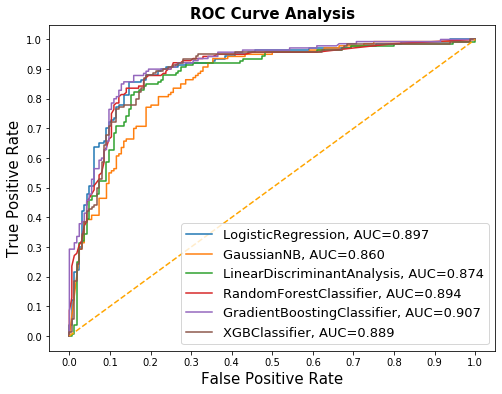

In [23]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [24]:
final =  run_exps(X_train_un, y_train_un,X_test_un, y_test_un)

LogReg
              precision    recall  f1-score   support

    no fraud       0.88      0.81      0.84       164
       fraud       0.80      0.87      0.83       140

    accuracy                           0.84       304
   macro avg       0.84      0.84      0.84       304
weighted avg       0.84      0.84      0.84       304

LDA
              precision    recall  f1-score   support

    no fraud       0.86      0.80      0.83       164
       fraud       0.78      0.85      0.82       140

    accuracy                           0.82       304
   macro avg       0.82      0.82      0.82       304
weighted avg       0.83      0.82      0.82       304

GNB
              precision    recall  f1-score   support

    no fraud       0.65      0.94      0.77       164
       fraud       0.85      0.41      0.55       140

    accuracy                           0.69       304
   macro avg       0.75      0.67      0.66       304
weighted avg       0.74      0.69      0.67       304

RF
 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

SVM
              precision    recall  f1-score   support

    no fraud       0.89      0.81      0.85       164
       fraud       0.80      0.89      0.84       140

    accuracy                           0.85       304
   macro avg       0.85      0.85      0.85       304
weighted avg       0.85      0.85      0.85       304

[15:17:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the 

In [25]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

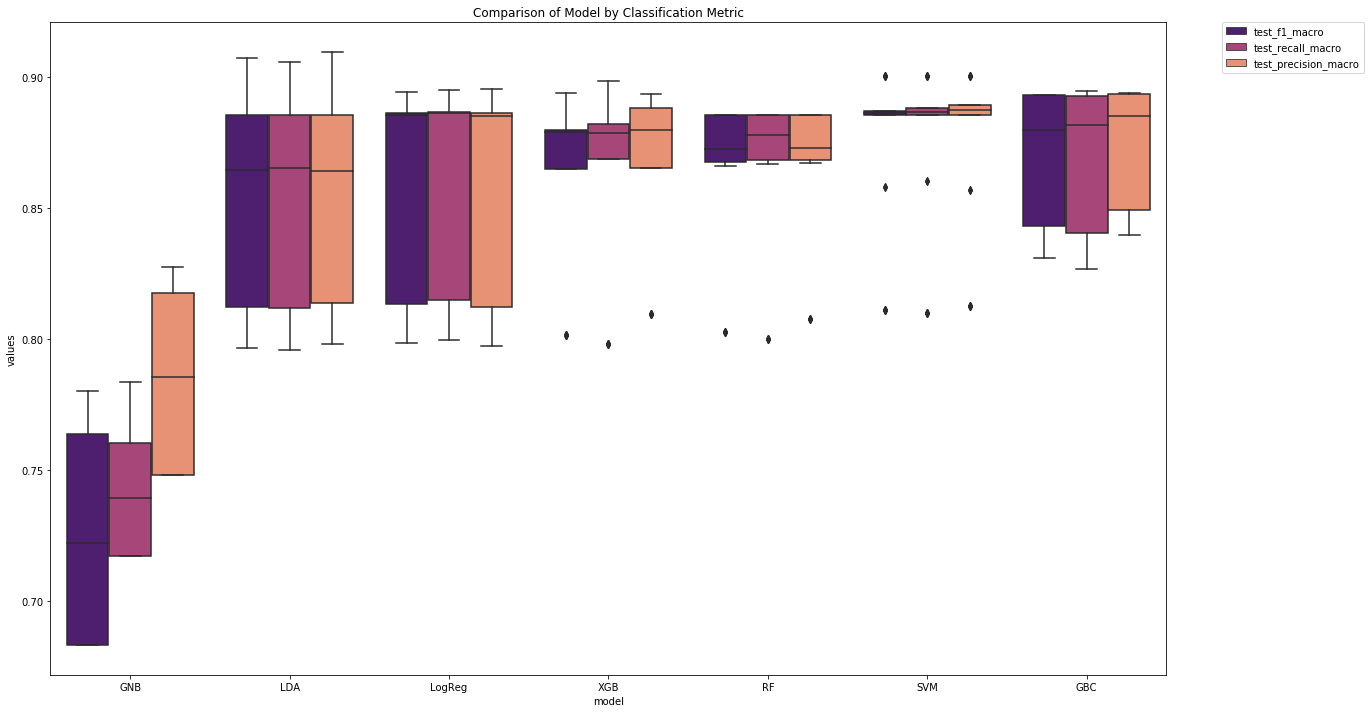

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
#sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

### SMOTE is working better than the undersampling technique

# Logistic regression

In [292]:
lr = LogisticRegression(penalty='l1', solver='liblinear', max_iter = 2000)
grid_values = {'C': [0.001,0.01,0.1,1,10,100,1000]}
LR = GridSearchCV(lr, param_grid=grid_values)


In [293]:
LR.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=2000, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [295]:
print('Best C:', LR.best_estimator_.get_params()['C'])

Best C: 1000


In [297]:
LR.best_score_

0.9203204661325565

In [300]:
lr_best = LogisticRegression(penalty='l1', solver='liblinear', max_iter = 2000, C = 1000, random_state = 100)

In [301]:
lr_best.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [303]:
print(classification_report(y_test_sm, lr_best.predict(X_test_sm)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1458
           1       0.92      0.93      0.93      1485

    accuracy                           0.93      2943
   macro avg       0.93      0.93      0.93      2943
weighted avg       0.93      0.93      0.93      2943



In [324]:
predicted_test_lr = lr_best.predict(X_test_sm)

Accuracy Score: 0.927285083248386
F1 Score: 0.928380187416332


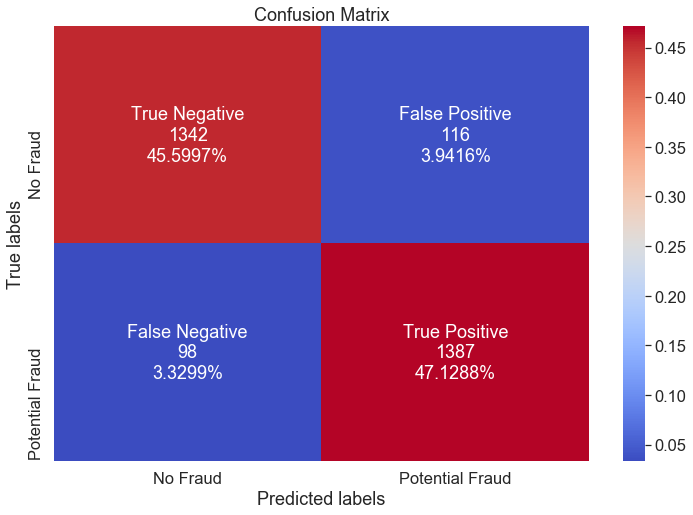

In [325]:
print(f'Accuracy Score: {accuracy_score(y_test_sm,predicted_test_lr)}')
print('F1 Score: {}'.format(f1_score(y_test_sm, predicted_test_lr)))
conf_mat(y_test_sm, predicted_test_lr)

In [326]:
print('Logistic Regression')
print('Accuracy Score for test data: {:.3f}'.format(accuracy_score(y_test_sm, predicted_test_lr)))
        
print('Precision Score for test data {:.3f}'.format(precision_score(y_test_sm, predicted_test_lr)))
        
print('Recall Score for test data {:.3f}'.format(recall_score(y_test_sm, predicted_test_lr)))
        
print('f1 score for test data{:.3f}'.format(f1_score(y_test_sm, predicted_test_lr)))
        
print('fbeta0.2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test_lr, beta = 0.5)))
        
print('fbeta2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test_lr, beta = 2)))
        
print('ROC-AUC Score for test data: {:.3f}'.format(roc_auc_score(y_test_sm, predicted_test_lr)))
        
print('Confusion matrix for test data')
print(confusion_matrix(y_test_sm, predicted_test_lr))

Logistic Regression
Accuracy Score for test data: 0.927
Precision Score for test data 0.923
Recall Score for test data 0.934
f1 score for test data0.928
fbeta0.2_score for test data0.925
fbeta2_score for test data0.932
ROC-AUC Score for test data: 0.927
Confusion matrix for test data
[[1342  116]
 [  98 1387]]


## Hyperparameter tuning and Grid search for gradient classifier

In [259]:
#paramerters for gradient classifier
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[50,100,200],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1],
    "subsample": [0.3, 0.9, 1.0]
}

clf= GridSearchCV(gbc,parameters,cv=5)
clf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...=None,
           

In [260]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}

In [261]:
clf_best = clf.best_estimator_.fit(X_train_sm, y_train_sm)

In [262]:
GradBoo_top15_features = pd.DataFrame(zip(x.columns, list(clf_best.feature_importances_)), columns=['feature', 'coef'])\
            .sort_values('coef', ascending=False).head(15)

Text(0, 0.5, '')

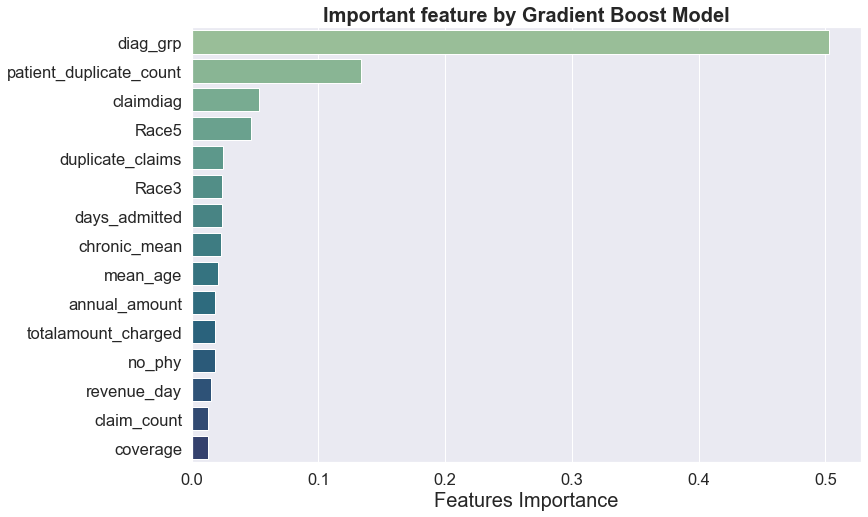

In [265]:
sns.set(font_scale=1.5)
ax = sns.barplot(x="coef", y="feature", data=GradBoo_top15_features ,palette="crest")
ax.set_title('Important feature by Gradient Boost Model', fontsize = 20, weight = 'bold')
ax.set_xlabel('Features Importance', fontsize = 20)
ax.set_ylabel('')

In [266]:
def conf_mat(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
    group_percentages = ['{0:.4%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm/np.sum(cm), annot=labels, ax = ax, fmt='', cmap='coolwarm');
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['No Fraud', 'Potential Fraud']); ax.yaxis.set_ticklabels(['No Fraud', 'Potential Fraud'])
    return

In [321]:
predicted_test_gb = clf_best.predict(X_test_sm)

Accuracy Score: 0.9599048589874278
F1 Score: 0.9604026845637583


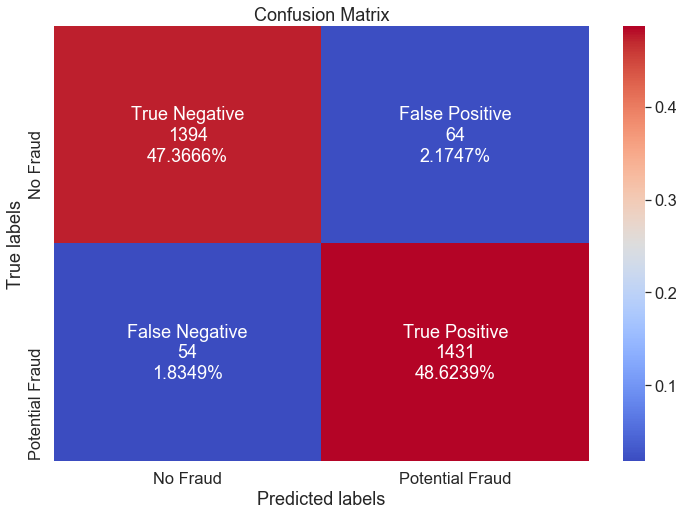

In [322]:

print(f'Accuracy Score: {accuracy_score(y_test_sm,predicted_test_gb)}')
print('F1 Score: {}'.format(f1_score(y_test_sm, predicted_test_gb)))
conf_mat(y_test_sm, predicted_test_gb)

In [323]:
print(' Gradient Boost')
print('Accuracy Score for test data: {:.3f}'.format(accuracy_score(y_test_sm, predicted_test_gb)))
        
print('Precision Score for test data {:.3f}'.format(precision_score(y_test_sm, predicted_test_gb)))
        
print('Recall Score for test data {:.3f}'.format(recall_score(y_test_sm, predicted_test_gb)))
        
print('f1 score for test data{:.3f}'.format(f1_score(y_test_sm, predicted_test_gb)))
        
print('fbeta0.2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test_gb, beta = 0.5)))
        
print('fbeta2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test_gb, beta = 2)))
        
print('ROC-AUC Score for test data: {:.3f}'.format(roc_auc_score(y_test_sm, predicted_test_gb)))
        
print('Confusion matrix for test data')
print(confusion_matrix(y_test_sm, predicted_test_gb))

 Gradient Boost
Accuracy Score for test data: 0.960
Precision Score for test data 0.957
Recall Score for test data 0.964
f1 score for test data0.960
fbeta0.2_score for test data0.958
fbeta2_score for test data0.962
ROC-AUC Score for test data: 0.960
Confusion matrix for test data
[[1394   64]
 [  54 1431]]


In [269]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
parameters = {
    "n_estimators":[100,250, 500],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1],
    "gamma": [0.1, 0.2, 0.3]
}
xb= GridSearchCV(xgb,parameters,cv=5)
xb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_co...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=False,
                                     validate_parameters=None, verbosity=

In [284]:
xb.best_params_

{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [316]:
xb_best = xb.best_estimator_.fit(X_train_sm, y_train_sm)

In [317]:
predicted_test_xgb = xb_best.predict(X_test_sm)

Accuracy Score: 0.9667006455997281
F1 Score: 0.9670698924731183


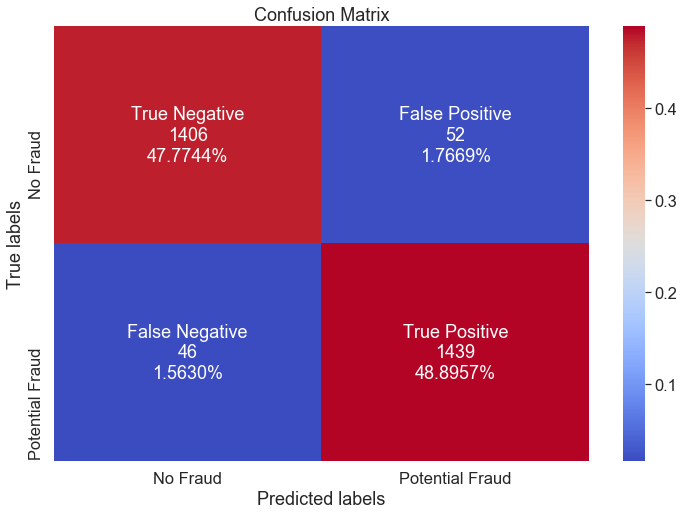

In [318]:
print(f'Accuracy Score: {accuracy_score(y_test_sm,predicted_test_xgb)}')
print('F1 Score: {}'.format(f1_score(y_test_sm, predicted_test_xgb)))
conf_mat(y_test_sm, predicted_test_xgb)

In [319]:
print('XGBoost')
print('Accuracy Score for test data: {:.3f}'.format(accuracy_score(y_test_sm, predicted_test_xgb)))
        
print('Precision Score for test data {:.3f}'.format(precision_score(y_test_sm, predicted_test_xgb)))
        
print('Recall Score for test data {:.3f}'.format(recall_score(y_test_sm, predicted_test_xgb)))
        
print('f1 score for test data{:.3f}'.format(f1_score(y_test_sm, predicted_test_xgb)))
        
print('fbeta0.2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test_xgb, beta = 0.5)))
        
print('fbeta2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test_xgb, beta = 2)))
        
print('ROC-AUC Score for test data: {:.3f}'.format(roc_auc_score(y_test_sm, predicted_test_xgb)))
        
print('Confusion matrix for test data')
print(confusion_matrix(y_test_sm, predicted_test_xgb))

XGBoost
Accuracy Score for test data: 0.967
Precision Score for test data 0.965
Recall Score for test data 0.969
f1 score for test data0.967
fbeta0.2_score for test data0.966
fbeta2_score for test data0.968
ROC-AUC Score for test data: 0.967
Confusion matrix for test data
[[1406   52]
 [  46 1439]]


In [274]:
XGB_top15_features = pd.DataFrame(zip(x.columns, list(xb_best.feature_importances_)), columns=['feature', 'coef'])\
            .sort_values('coef', ascending=False).head(15)

Text(0, 0.5, '')

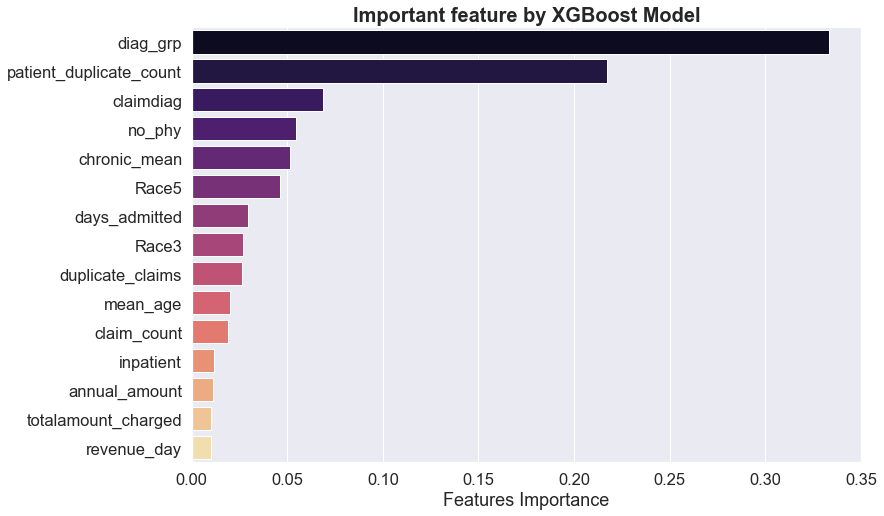

In [275]:
plt.rcParams['figure.figsize'] = (12,8)
sns.set(font_scale=1.5)
ax = sns.barplot(x="coef", y="feature", data=XGB_top15_features,palette="magma" )
ax.set_title('Important feature by XGBoost Model', fontsize = 20, weight = 'bold')
ax.set_xlabel('Features Importance')
ax.set_ylabel('')

In [276]:
param_grid = {
    'max_depth': [50,80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)


In [277]:
grid_search.fit(X_train_sm, y_train_sm)
grid_search.best_params_


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 21.6min finished


{'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [278]:
bestRF = RandomForestClassifier(max_depth= 50, max_features= 3, min_samples_leaf=3, min_samples_split=8,
                                n_estimators= 300)

In [279]:
bestRF.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [312]:
predicted_test_RF = bestRF.predict(X_test_sm)

Accuracy Score: 0.944954128440367
F1 Score: 0.9467805519053876


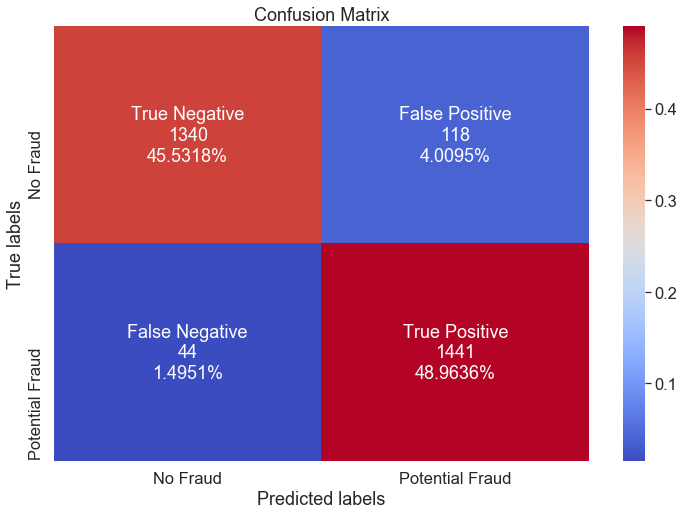

In [313]:
print(f'Accuracy Score: {accuracy_score(y_test_sm,predicted_test_RF)}')
print('F1 Score: {}'.format(f1_score(y_test_sm, predicted_test_RF)))
conf_mat(y_test_sm, predicted_test_RF)

In [315]:
print('RANDOM FOREST')
print('Accuracy Score for test data: {:.3f}'.format(accuracy_score(y_test_sm, predicted_test_RF)))
        
print('Precision Score for test data {:.3f}'.format(precision_score(y_test_sm, predicted_test_RF)))
        
print('Recall Score for test data {:.3f}'.format(recall_score(y_test_sm, predicted_test_RF)))
        
print('f1 score for test data{:.3f}'.format(f1_score(y_test_sm, predicted_test_RF)))
        
print('fbeta0.2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test_RF, beta = 0.5)))
        
print('fbeta2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test_RF, beta = 2)))
        
print('ROC-AUC Score for test data: {:.3f}'.format(roc_auc_score(y_test_sm, predicted_test_RF)))
        
print('Confusion matrix for test data')
print(confusion_matrix(y_test_sm, predicted_test_RF))

RANDOM FOREST
Accuracy Score for test data: 0.945
Precision Score for test data 0.924
Recall Score for test data 0.970
f1 score for test data0.947
fbeta0.2_score for test data0.933
fbeta2_score for test data0.961
ROC-AUC Score for test data: 0.945
Confusion matrix for test data
[[1340  118]
 [  44 1441]]


In [282]:
RF_top15_features = pd.DataFrame(zip(x.columns, list(bestRF.feature_importances_)), columns=['feature', 'coef'])\
            .sort_values('coef', ascending=False).head(15)

Text(0, 0.5, '')

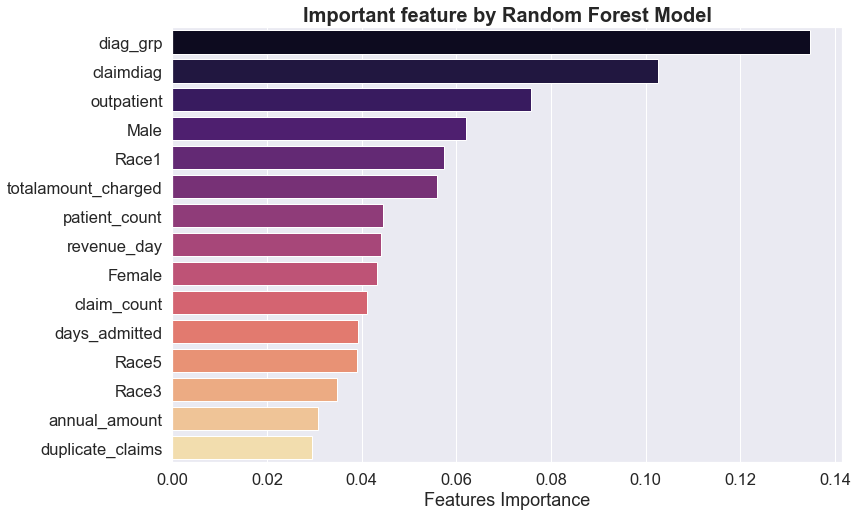

In [283]:
plt.rcParams['figure.figsize'] = (12,8)
ax = sns.barplot(x="coef", y="feature", data=RF_top15_features,palette= 'magma')
ax.set_title('Important feature by Random Forest Model', fontsize = 20, weight = 'bold')
ax.set_xlabel('Features Importance')
ax.set_ylabel('')

Accuracy Score: 0.9609242269792728
F1 Score: 0.9616282949616283


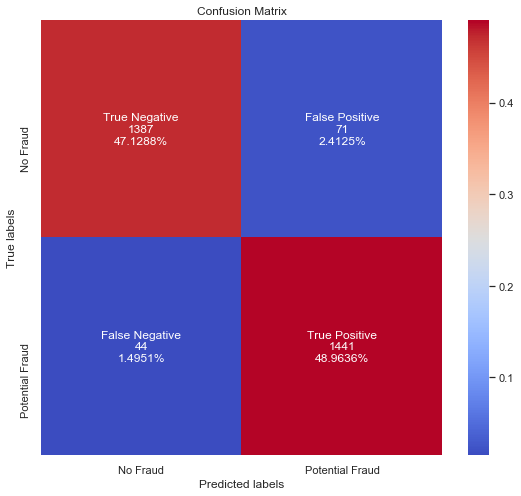

In [415]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('GBC', clf_best), ('XGB', xb_best),('RF',bestRF)], voting='hard')
ensemble.fit(X_train_sm, y_train_sm)
y_pred_em = ensemble.predict(X_test_sm)

print(f'Accuracy Score: {accuracy_score(y_test_sm, y_pred_em)}')
print('F1 Score: {}'.format(f1_score(y_test_sm, y_pred_em)))
conf_mat(y_test_sm, y_pred_em)

In [421]:
print('Ensemble')
print('Accuracy Score for test data: {:.3f}'.format(accuracy_score(y_test_sm, y_pred_em)))
        
print('Precision Score for test data {:.3f}'.format(precision_score(y_test_sm, y_pred_em)))
        
print('Recall Score for test data {:.3f}'.format(recall_score(y_test_sm, y_pred_em)))
        
print('f1 score for test data{:.3f}'.format(f1_score(y_test_sm, y_pred_em)))
        
print('fbeta0.2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, y_pred_em, beta = 0.5)))
        
print('fbeta2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, y_pred_em, beta = 2)))
        
print('ROC-AUC Score for test data: {:.3f}'.format(roc_auc_score(y_test_sm, y_pred_em)))
        
print('Confusion matrix for test data')
print(confusion_matrix(y_test_sm, y_pred_em))

Ensemble
Accuracy Score for test data: 0.961
Precision Score for test data 0.953
Recall Score for test data 0.970
f1 score for test data0.962
fbeta0.2_score for test data0.956
fbeta2_score for test data0.967
ROC-AUC Score for test data: 0.961
Confusion matrix for test data
[[1387   71]
 [  44 1441]]


In [386]:
results = pd.DataFrame({'Metrics' : ['Accuracy', 'F2 Beta', 'AUC'],
                       'Logistic Regression' : [92.7, 92.5, 92.7],
                       'Random Forest' : [94.5, 96.1, 94.5],
                       'Gradient Boost' : [96, 96.2, 96.6],
                       'XGBoost' : [96.7, 96.8, 96.7],
                        'Ensemble' : [96.1, 96.2, 96.1]
                       })

In [387]:
results

,Metrics,Logistic Regression,Random Forest,Gradient Boost,XGBoost,Ensemble
0,Accuracy,92.7,94.5,96.0,96.7,96.1
1,F2 Beta,92.5,96.1,96.2,96.8,96.2
2,AUC,92.7,94.5,96.6,96.7,96.1


In [422]:
results2 = pd.DataFrame({'Model': ['Random Forest', 'Gradient Boost', 'XGBoost', 'Ensemble'], 
                        'Accuracy' : [94.5, 96, 96.7, 96.1],
                        'F2 beta' : [96.1, 96.2, 96.8, 96.7], 
                        'AUC' : [94.5, 96.0 ,96.7, 96.1]})

In [412]:
results2

,Model,Accuracy,F2 beta,AUC
0,Random Forest,94.5,96.1,94.5
1,Gradient Boost,96.0,96.2,96.0
2,XGBoost,96.7,96.8,96.7


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

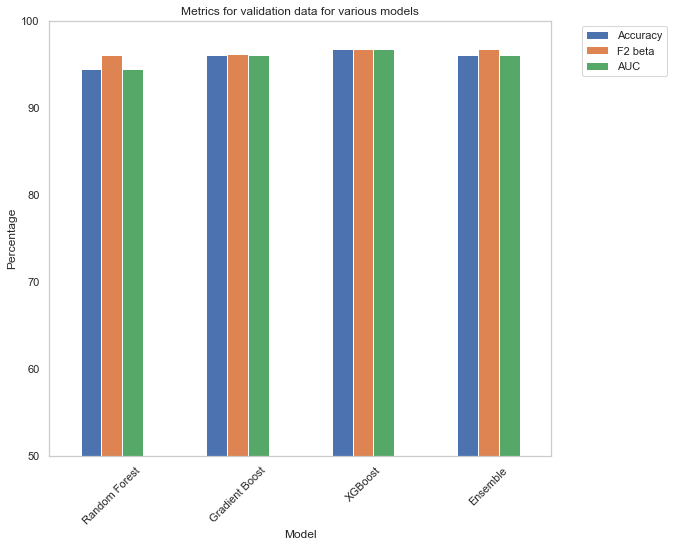

In [423]:
results2.plot(x = 'Model', y = ['Accuracy', 'F2 beta', 'AUC'], kind = 'bar')
plt.title('Metrics for validation data for various models')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(50, 100)
plt.xticks(rotation=45)


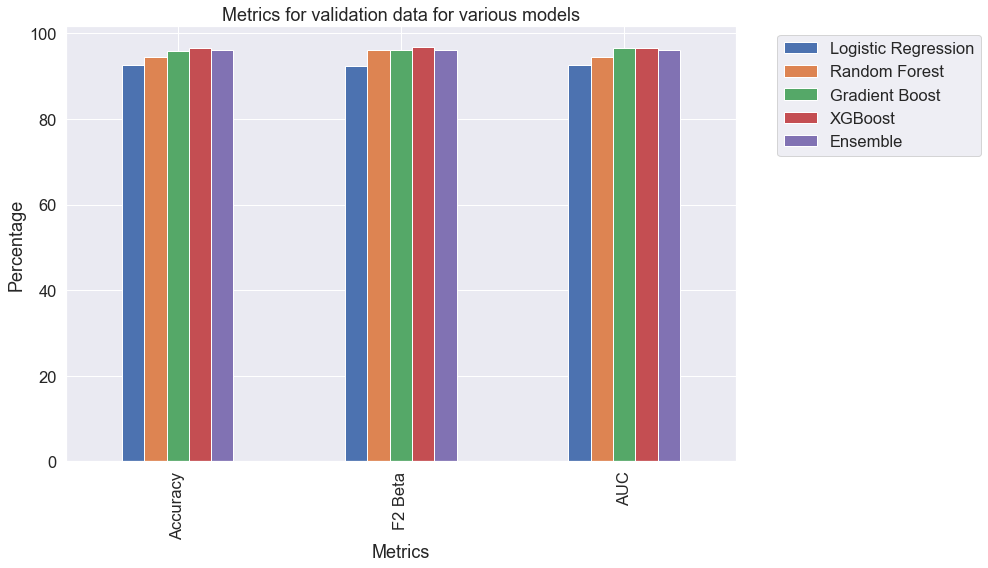

In [389]:
#Comparative study of the different metrics of various models
results.plot(x = 'Metrics', y = ['Logistic Regression', 'Random Forest', 'Gradient Boost', 'XGBoost', 'Ensemble'], kind = 'bar')
plt.title('Metrics for validation data for various models')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Post-modeling EDA

In [71]:
patient_record = pd.read_csv('patient_record.csv', low_memory=False)

In [72]:
patient_record.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'patient_type', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'Chroni

In [78]:
both = patient_record.loc[patient_record.patient_type == 'both']

In [114]:
inpatient = patient_record.loc[patient_record.patient_type == 'inpatient']

In [113]:
outpatient = patient_record.loc[patient_record.patient_type == 'outpatient']

In [101]:
both.PotentialFraud.value_counts()

Yes    134682
No     121782
Name: PotentialFraud, dtype: int64

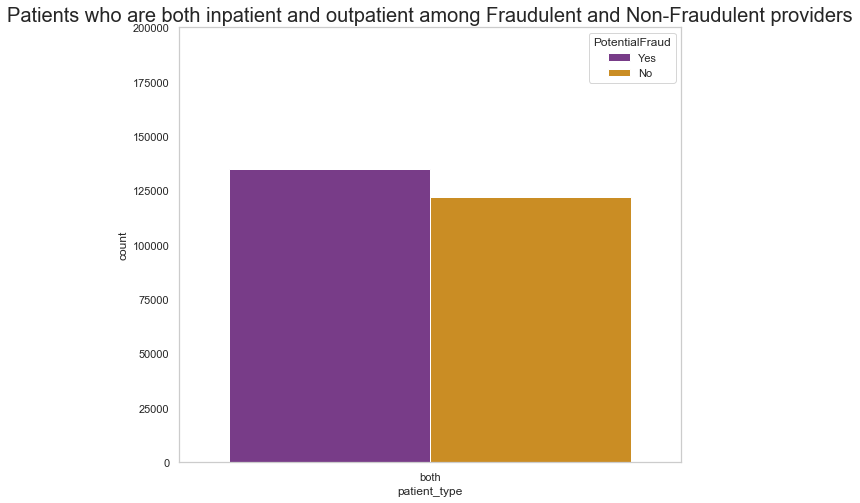

In [409]:
plt.rcParams['figure.figsize'] = (9,8)

ax = sns.countplot(data = both, x = 'patient_type', hue = 'PotentialFraud', palette= 'CMRmap')
ax.set_title('Patients who are both inpatient and outpatient among Fraudulent and Non-Fraudulent providers', fontsize=20)
ax.set(ylim=(0, 200000))
sns.set_style("whitegrid", {'axes.grid' : False})


Text(0.5, 1.0, 'Patients who are both inpatient and outpatient among Fraudulent and Non-Fraudulent providers')

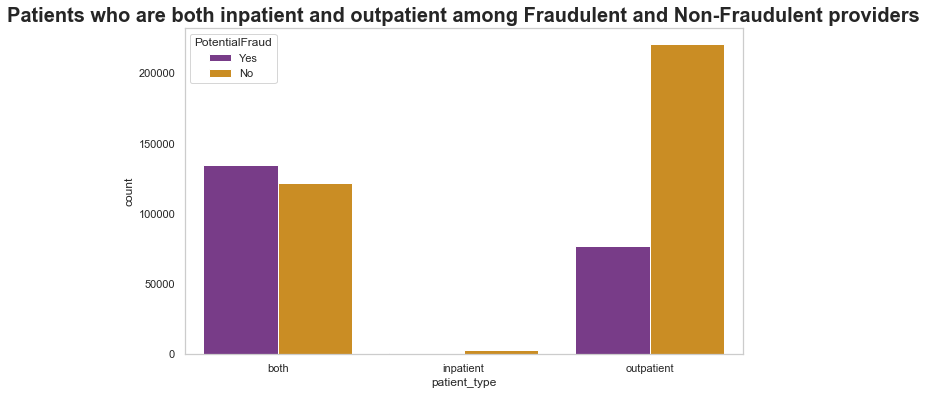

In [406]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.countplot(data = patient_record, x = 'patient_type', hue = 'PotentialFraud', palette= 'CMRmap')
ax.set_title('Patients who are both inpatient and outpatient among Fraudulent and Non-Fraudulent providers',
             weight = 'bold', fontsize=20)


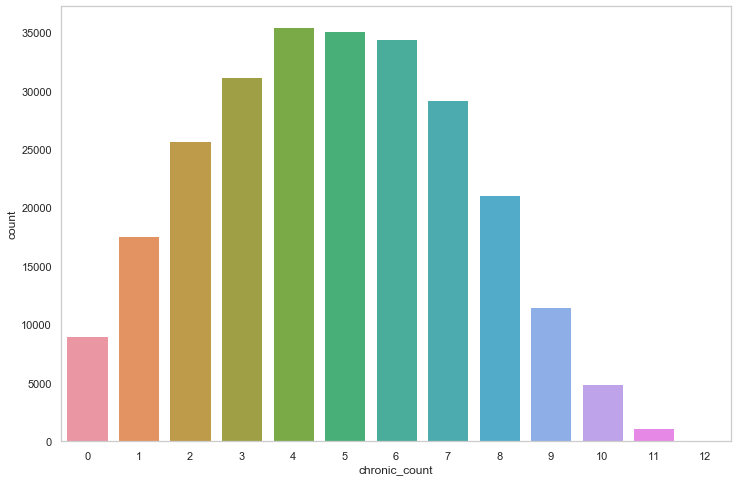

In [112]:
sns.countplot(data = both, x = 'chronic_count')

[Text(0, 0.5, 'Number of visits to hospital'),
 Text(0.5, 0, 'Number of chronic condition')]

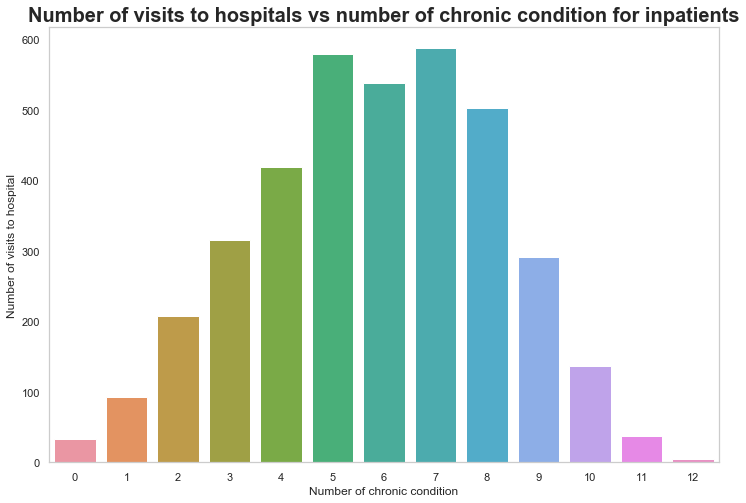

In [140]:
ax = sns.countplot(data = inpatient, x = 'chronic_count')
ax.set_title('Number of visits to hospitals vs number of chronic condition for inpatients',  
              weight = 'bold', fontsize=20)
ax.set(xlabel = 'Number of chronic condition', ylabel = 'Number of visits to hospital')

In [ ]:
sns.catplot(data = patient_record, x = 'chronic_count', hue = 'PotentialFraud', col = 'patient_type')
#ax.set_title('Number of visits to hospitals vs number of chronic condition for inpatients',  
              #weight = 'bold', fontsize=20)
#ax.set(xlabel = 'Number of chronic condition', ylabel = 'Number of visits to hospital')

In [285]:
patient_record.patient_type.value_counts()

outpatient    298000
both          256464
inpatient       3747
Name: patient_type, dtype: int64

[Text(0, 0.5, 'Number of visits to hospital'),
 Text(0.5, 0, 'Number of chronic condition')]

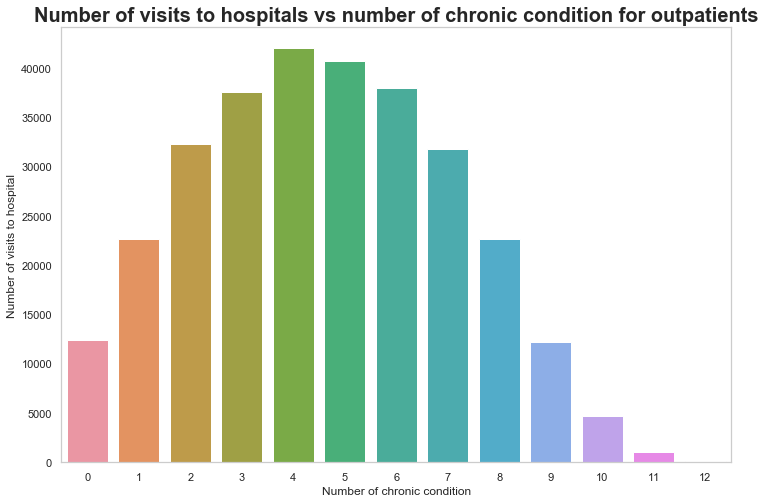

In [141]:
ax = sns.countplot(data = outpatient, x = 'chronic_count')
ax.set_title('Number of visits to hospitals vs number of chronic condition for outpatients',  
              weight = 'bold', fontsize=20)
ax.set(xlabel = 'Number of chronic condition', ylabel = 'Number of visits to hospital')

In [ ]:
sns.countplot(data = patient_record, x = 'PotentialFraud', y = 'ClaimID')

In [425]:
claim = patient_record.groupby(['PotentialFraud'])['ClaimID'].count().reset_index(name = 'claim_count')

In [428]:
claim

,PotentialFraud,claim_count
0,No,345415
1,Yes,212796


([<matplotlib.axis.YTick at 0x7fb6c26d2050>,
 <a list of 2 Text yticklabel objects>)

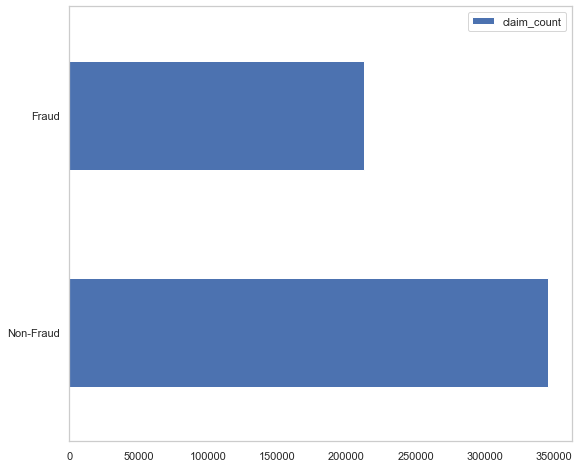

In [434]:
claim.plot(y = 'claim_count', kind = 'barh')
plt.yticks([0, 1], ['Non-Fraud', 'Fraud'])

Text(0.5, 1.0, 'Pie Chart based on number of claims')

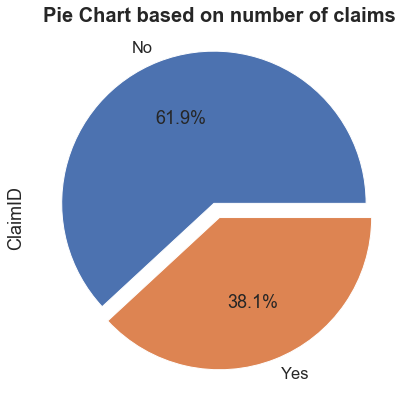

In [390]:
#plotting pie chart
sns.set(font_scale=1.5)
explode = (0.1, 0)
claim.plot.pie(autopct='%1.1f%%',figsize=(7,7),explode = explode)
plt.title("Pie Chart based on number of claims", fontsize  =20, fontweight = 'bold')

In [157]:
bene_pro = inpatient.groupby('BeneID')['Provider'].nunique().reset_index()
bene_list = bene_pro[bene_pro['Provider'] > 1].BeneID.to_list()

In [158]:
inpatient.loc[inpatient.BeneID.isin(bene_list),'Multiple_provider'] = 1
inpatient.loc[~inpatient.BeneID.isin(bene_list),'Multiple_provider'] = 0

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [161]:
multiple_prov = inpatient.groupby(['PotentialFraud', 'Provider'])['Multiple_provider'].mean().\
                reset_index(name = 'multiple_prov')

In [184]:
provider4.head(3)

,Unnamed: 0,Provider,PotentialFraud,patient_count,Race1,Race2,Race3,Race5,Male,Female,mean_age,state_count,phy_count,no_phy,chronic_mean,claim_count,claimdiag,diag_grp,patient_duplicate_count,duplicate_claims,totalamount_charged,revenue_day,annual_amount,coverage,inpatient,outpatient
0,0,PRV51001,0,24,20.0,4.0,0.0,0.0,9.0,15.0,78.0,1,14,0.0,6.0,25,11.0,5.0,0.0,11.0,4399.200000,593.477613,21582.240000,0.975656,0,0
1,1,PRV51003,1,117,94.0,22.0,0.0,1.0,49.0,68.0,70.0,3,44,0.0,5.0,132,58.0,58.0,0.0,25.0,5090.575758,767.409611,11914.909091,0.912167,0,0
2,2,PRV51004,0,138,113.0,20.0,5.0,0.0,45.0,93.0,72.0,9,38,0.0,4.0,149,25.0,0.0,0.0,72.0,352.214765,89.319562,7604.483221,0.978485,0,1


In [185]:
provider4.groupby(['PotentialFraud'])['no_phy'].count()

PotentialFraud
0    4904
1     506
Name: no_phy, dtype: int64

In [191]:
patient_record.groupby(['PotentialFraud'])['noPhysician'].value_counts()

PotentialFraud  noPhysician
No              False          344484
                True              931
Yes             False          212244
                True              552
Name: noPhysician, dtype: int64

In [204]:
provider4.groupby(['PotentialFraud'])['no_phy'].value_counts()

PotentialFraud  no_phy
0               0.0       4216
                1.0        514
                2.0        127
                3.0         29
                4.0         15
                5.0          2
                6.0          1
1               0.0        298
                1.0        100
                2.0         33
                3.0         27
                5.0         19
                4.0         10
                7.0          6
                6.0          5
                10.0         3
                8.0          2
                9.0          1
                12.0         1
                31.0         1
Name: no_phy, dtype: int64

In [205]:
provider4.loc[provider4.no_phy == 31]

,Unnamed: 0,Provider,PotentialFraud,patient_count,Race1,Race2,Race3,Race5,Male,Female,mean_age,state_count,phy_count,no_phy,chronic_mean,claim_count,claimdiag,diag_grp,patient_duplicate_count,duplicate_claims,totalamount_charged,revenue_day,annual_amount,coverage,inpatient,outpatient
363,363,PRV51459,1,2857,2136.0,164.0,388.0,169.0,1216.0,1641.0,74.0,10,7,31.0,5.0,8240,582.0,0.0,7.0,3613.0,284.548544,76.618414,7579.889078,0.982011,0,1


In [395]:
plt.rcParams['figure.figsize'] = (16,8)

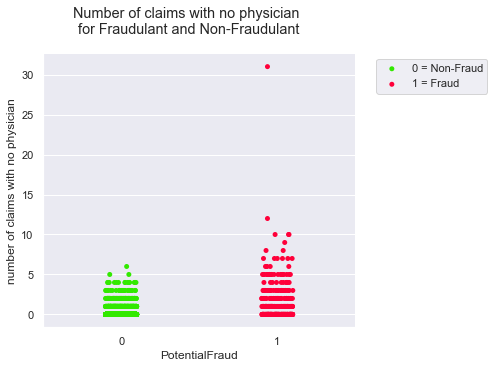

In [401]:
sns.set(font_scale=1.0)
ax = sns.catplot(data = provider4, x = 'PotentialFraud', y = 'no_phy', palette="prism")
ax.fig.suptitle('Number of claims with no physician \nfor Fraudulant and Non-Fraudulant')
ax.fig.subplots_adjust( top = 0.85 )
ax.set(ylabel = 'number of claims with no physician')
plt.legend(['0 = Non-Fraud', '1 = Fraud'], bbox_to_anchor=(1.05, 1), loc=2)

In [238]:
provider4.groupby(['PotentialFraud'])['Race3'].value_counts()

PotentialFraud  Race3
0               0.0      2734
                1.0       928
                2.0       426
                3.0       211
                4.0       149
                         ... 
1               130.0       1
                133.0       1
                135.0       1
                239.0       1
                388.0       1
Name: Race3, Length: 102, dtype: int64

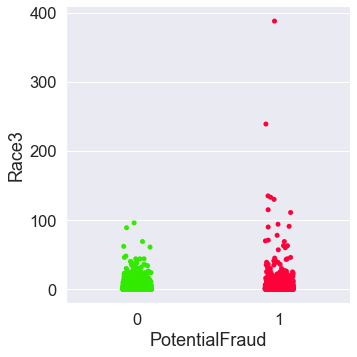

In [239]:
sns.catplot(data = provider4, x = 'PotentialFraud', y = 'Race3', palette="prism")

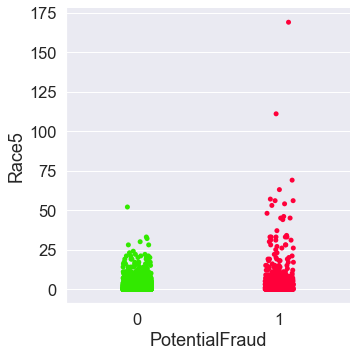

In [240]:
sns.catplot(data = provider4, x = 'PotentialFraud', y = 'Race5', palette="prism")

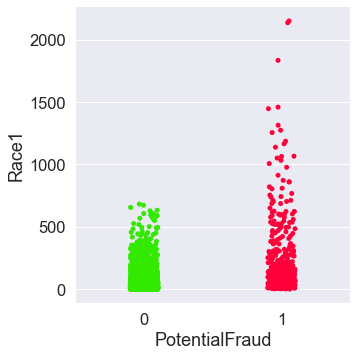

In [243]:
sns.catplot(data = provider4, x = 'PotentialFraud', y = 'Race1', palette="prism")

In [244]:
provider4.columns

Index(['Unnamed: 0', 'Provider', 'PotentialFraud', 'patient_count', 'Race1',
       'Race2', 'Race3', 'Race5', 'Male', 'Female', 'mean_age', 'state_count',
       'phy_count', 'no_phy', 'chronic_mean', 'claim_count', 'claimdiag',
       'diag_grp', 'patient_duplicate_count', 'duplicate_claims',
       'totalamount_charged', 'revenue_day', 'annual_amount', 'coverage',
       'inpatient', 'outpatient'],
      dtype='object')

In [ ]:

print('Accuracy Score for test data: {:.3f}'.format(accuracy_score(y_test_sm, predicted_test)))
        
print('Precision Score for test data {:.3f}'.format(precision_score(y_test_sm, predicted_test)))
        
print('Recall Score for test data {:.3f}'.format(recall_score(y_test_sm, predicted_test)))
        
print('f1 score for test data{:.3f}'.format(f1_score(y_test_sm, predicted_test)))
        
print('fbeta0.2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test, beta = 0.5)))
        
print('fbeta2_score for test data{:.3f}'.format(fbeta_score(y_test_sm, predicted_test, beta = 2)))
        
print('ROC-AUC Score for test data: {:.3f}'.format(roc_auc_score(y_test_sm, predicted_test)))
        
print('Confusion matrix for test data')
print(confusion_matrix(y_test_sm, predicted_test))